<img src="ku_logo_uk_v.png" alt="drawing" width="500" style="float:right"/>


# Welcome to Workshop 9 - Introduction to Programming and Numerical Analysis !!!

# Today - Data Project!

# Repository structure
- clean your folders
- write a README.md
- .py files for functions

[My Dataproject](https://github.com/NumEconCopenhagen/projects-2021-the-danish-german-alliance/blob/master/The-Danish-German-Alliance/dataproject/dataproject.ipynb) (don't copy the structure)


<img src="lego_pic.png" alt="drawing" width="500" style="float:right"/>


# The good dataproject
- Clean structure
- Creative use of data
- Tell a story!

# Maybe regress stuff?!
- I have made an example

In [1]:
import numpy as np 
from numpy import linalg as la
import requests
import pandas as pd
import io
import types




In [2]:
def estimate( 
        y: np.array, x: np.array, t: int=None, robust_se = True
    ) -> list:
    """Uses the provided estimator to perform a regression of y on x, 
    and provides all other necessary statistics such as standard errors, 
    t-values etc.  

    Args:
        >> y (np.array): Dependent variable (Needs to have shape 2D shape)
        >> x (np.array): Independent variable (Needs to have shape 2D shape)
        >> t (int, optional): If panel data, t is the number of time periods in
        the panel, and is used for estimating the variance. Defaults to None.

    Returns:
        list: Returns a dictionary with the following variables:
        'b_hat', 'se', 'sigma2', 't_values', 'R2', 'cov'
    """
    
    b_hat = la.inv(x.T@x)@(x.T@y)  # Estimated coefficients
    
    residual = y - x@b_hat  # Calculated residuals
    SSR = residual.T@residual  # Sum of squared residuals
    
    SST = (y - np.mean(y)).T@(y - np.mean(y))  # Total sum of squares
    
    R2 = 1 - SSR/SST # R squared

    k = x.shape[1] # cols
    n = x.shape[0] # rows

    # Calculate sigma2
    sigma2 = (np.array(SSR/(n - k)))

   
    if robust_se:
        # If only cross sectinoal, we can easiily use the diagonal.
        if not t:
            uhat2 = residual * residual # Uhat squared
            diag = np.diag(uhat2.reshape(-1, )) # reshape u hat squared
            cov = la.inv(x.T@x) @ (x.T@diag@x) @ la.inv(x.T@x) # calculate covariance
    
        # Else we loop over each individual.
        else:
            n = int(residual.size / t)  # res size over time periods 
            k = x.shape[1] # cols
            diag = np.zeros((k, k)) # init diagonal calc
            for i in range(0, n*t, t):
                slice_obj = slice(i, i + t) # slicing i to i + time 
                uhat2 = residual[slice_obj]@residual[slice_obj].T # calculation u hat squared
                diag += x[slice_obj].T @ uhat2 @ x[slice_obj] #adding to diagonal
            cov = la.inv(x.T@x)@(diag)@la.inv(x.T@x) # covariance

        se = np.sqrt(np.diag(cov)).reshape(-1, 1) # standard error
    else:
        cov = sigma2*la.inv(x.T@x) # covariance
        se = np.sqrt(cov.diagonal()).reshape(-1, 1) # standard errors
        
    
    t_values = b_hat/se # t-vals
    res = types.SimpleNamespace()
    res.b_hat = b_hat
    res.se = se.T
    res.sigma2 = sigma2
    res.t_values = t_values
    res.R2 = R2
    res.cov = cov
    
    return res




In [3]:
#found some data
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'
# get it 
urlData = requests.get(url).content
#in a df from a string in csv format
df = pd.read_csv(io.StringIO(urlData.decode('utf-8')))
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\45238\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


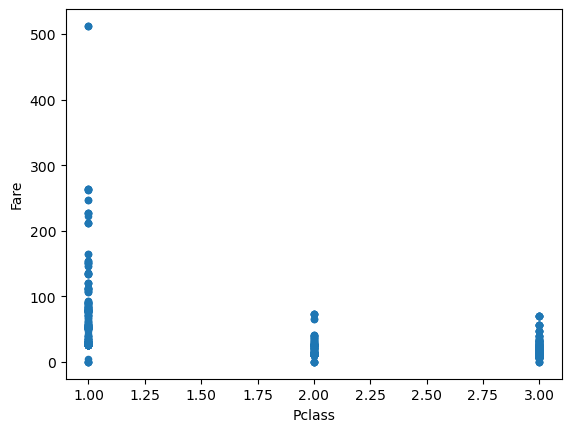

In [4]:
df.plot.scatter(x = 'Pclass', y = 'Fare');



In [5]:
vars = ['Fare','Pclass','Survived', 'Age', 'Embarked']
df = df[vars]  #subseting df
df = pd.concat([df,pd.get_dummies(df.Embarked)], axis = 1)
df = df.drop(['Embarked'], axis=1)
df = df.apply(pd.to_numeric) # All values to numeric
df = df.dropna(axis=0,inplace=False) # dropping nans (important)



In [6]:
x_vals = df.columns.to_list()
x_vals.pop(2)



'Survived'

In [7]:
y = df.Survived.values# fare = ticket price
x = df[x_vals].values# x vals



In [14]:
reg = estimate(y, x, robust_se = False) #Reeeeeeg y x



In [15]:
reg.b_hat.round(2)


array([ 0.  , -0.21, -0.01,  1.12,  1.03,  1.01])

In [ ]:
dic ={}
data = ['alc', 'life', 'osv']
for i in data:
    dic[i] = pd.read_csv(f"{i}.csv")
